In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from datetime import datetime

myfile='./CAR_PRICE_DATA_1.csv'
df = pd.read_csv(myfile) #, low_memory=False
rows, cols = df.shape

In [2]:
output_notebook()

Loading BokehJS ...

In [46]:
from bokeh.models import (
    ColorBar,
    LinearColorMapper,
    Plot,
    Range1d,
    LinearAxis,
    FixedTicker,
    FuncTickFormatter,
)

TOOLS="pan,wheel_zoom,box_zoom,tap,box_select,lasso_select,reset,save"
weekday = []
for i in range(rows):
    mydate = df.ix[i,'POSTTIME']
    md = datetime.strptime( mydate,'%Y-%m-%d %H:%M' ) 
    weekday.append(md.isoweekday())  #Monday 1 ...
count = [0,0,0,0,0,0,0] #1-7 Mon-Sun
for i in range(rows):
    count[weekday[i]-1] += 1
for n in range(7):
    count[n] = float(count[n])/rows
        

p2 = figure(title='Post traffic (week)', x_axis_label='Time', y_axis_label='# of Posts', tools= TOOLS)
p2.vbar(x=range(7), top=count, bottom = 0,  width=0.5, color="blue", alpha=0.5)
p2.xaxis.ticker = FixedTicker(ticks=range(7))
#p2.xaxis.ticker = TickFormatter(labels={0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6:'Sun'})

xtickl = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
label_dict = {}
for i, s in enumerate(xtickl):
    label_dict[i] = s
p2.xaxis.formatter = FuncTickFormatter(code="""
    var labels = %s;
    return labels[tick];
""" % label_dict)

show(p2)

In [47]:
hour = []
for i in range(rows):
    mytime = df.ix[i, 'POSTTIME']
    #print mytime
    mt = datetime.strptime( mytime,'%Y-%m-%d %H:%M' ) 
    #datetime.datetime.strptime(mytime, '%H:%M').time()
    hour.append(mt.time().hour)
count = map(float, np.zeros(24)) 
for i in range(rows):
    count[hour[i]] += 1.0

for n in range(24):
    count[n] /= rows

p1 = figure(title='Post traffic (day)', x_axis_label='Hour', y_axis_label='# of Posts', tools= TOOLS)
ind = range(0,24)
p1.vbar(x=ind, top=count, bottom = 0,  width=0.5, color="blue", alpha=0.5)
p1.xaxis.ticker = FixedTicker(ticks=range(0,24,3))

xtickl = ['0AM','3AM','6AM', '9AM', '12PM', '3PM', '6PM', '9PM']
label_dict = {}
for i, s in enumerate(xtickl):
    label_dict[i*3] = s
p1.xaxis.formatter = FuncTickFormatter(code="""
    var labels = %s;
    return labels[tick];
""" % label_dict)

show(p1)

In [48]:
df1 = df[df.MODEL == 'camry'] 
#get certain model
rows, cols = df1.shape
print 'df1', rows, cols
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values

x = year
y = mile/1000.0
z = price

radii = z/40000.0
colors = ["#%02x%02x%02x" % (int(r), 0, 200) for r in radii*500
    #(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
]

TOOLS="pan,box_select,poly_select,lasso_select,wheel_zoom,box_zoom,reset,tap,hover,save"  #crosshair,redo,undo

p = figure(title="Price distribution", plot_width=600, plot_height=600, tools=TOOLS)

p.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.4, line_color=None)

#output_file("color_scatter.html", title="color_scatter.py example")
p.xaxis[0].axis_label = 'Year'
p.yaxis[0].axis_label = 'Mileage (k)'
show(p)

df1 7358 14


In [49]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool, ColumnDataSource

df1 = df[df.MODEL == 'camry']
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values
imglinks = df1.ix[:,'IMGLINK'].values

#x = year
milek = mile/1000.0
z = price

'''
source = ColumnDataSource(
        data = dict(
            yr = year,
            mi = mile/1000.0,
            pr = price,
            radii = price/40000.0,
            link = imglinks,
         ) )
'''

source = ColumnDataSource(data=dict(
    x=year.tolist(),
    y=milek.tolist(),
    price=price.tolist(),
))


radii = price/40000.0

#hover = HoverTool(tooltips=[
#    ('index', '$index'),
#    ('(year, miles)', '($yr, $mi)'),
#    ('price', '$pr'),
#])

colors = [
    "#%02x%02x%02x" % (int(r), 0, 200) for r in radii*500
    #(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
]

TOOLS="hover,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(title="Toyota Camry Price ($)", plot_width=700, plot_height=700, tools=TOOLS)

#p.scatter(x, y, radius=radii,fill_color=colors, fill_alpha=0.4,
#          line_color=None)

p.scatter('x', 'y', source = source, radius='radii',fill_color=colors, fill_alpha=0.4,
          line_color=None )

#output_file("color_scatter.html", title="color_scatter.py example")
p.xaxis[0].axis_label = 'Year'
p.yaxis[0].axis_label = 'Mileage (k)'


hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("price", "@price"),
    ("(year, miles)", "($x, $y)"),
]

show(p)  # open a browser

/Users/xiangs/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


In [50]:
output_notebook()

Loading BokehJS ...

In [51]:
df1 = df[df.MODEL == 'camry']
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values
imglinks = df1.ix[:,'IMGLINK'].values

radii = price/40000.0

#hover = HoverTool(tooltips=[
#    ('index', '$index'),
#    ('(year, miles)', '($yr, $mi)'),
#    ('price', '$pr'),
#])

colors = [
    "#%02x%02x%02x" % (int(r), 0, 200) for r in price/80.0
    #(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
]

myyear = year.tolist()[:10]
mymile = milek.tolist()[:10]
myprice=price.tolist()[:10]
myimg = imglinks.tolist()[:10]
mycolor=colors[:10]
myrad = radii.tolist()[:10]
print type(mycolor)
print type(myrad)
print mycolor
print myrad
print myyear
print type(myyear)
print myimg

<type 'list'>
<type 'list'>
['#2700c8', '#3d00c8', '#d200c8', '#1b00c8', '#6e00c8', '#1900c8', '#3a00c8', '#5000c8', '#4100c8', '#cb00c8']
[0.07875, 0.1225, 0.42, 0.055, 0.22, 0.05125, 0.116275, 0.16, 0.13125, 0.4072]
[2001, 2006, 2014, 2001, 2009, 2010, 2007, 2010, 2005, 2016]
<type 'list'>
['https://images.craigslist.org/00808_4eqNrpQYNlo_600x450.jpg', 'https://images.craigslist.org/00r0r_8pA1XlbDnxZ_600x450.jpg', 'https://images.craigslist.org/00Y0Y_8vq8hTE8cqu_600x450.jpg', 'https://images.craigslist.org/00V0V_dyt1y7HUmsj_600x450.jpg', 'https://images.craigslist.org/00x0x_jSgM65bQdh1_600x450.jpg', 'https://images.craigslist.org/00404_loKBnvCSA4J_600x450.jpg', 'https://images.craigslist.org/00A0A_iRHi0ideWZ4_600x450.jpg', 'https://images.craigslist.org/00U0U_7NvyhDCbzo3_600x450.jpg', 'https://images.craigslist.org/00v0v_h7Hw0IVOikT_600x450.jpg', 'https://images.craigslist.org/00G0G_awqVhh0HAY7_600x450.jpg']


In [62]:
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import (HoverTool, PanTool, ResetTool, SaveTool, TapTool,CrosshairTool,
                          WheelZoomTool, BoxSelectTool, BoxZoomTool, LassoSelectTool)
output_notebook()

Loading BokehJS ...

In [52]:
import math 
df1 = df[df.MODEL == 'camry']
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values
imglinks = df1.ix[:,'IMGLINK'].values

radii = map(math.sqrt, [a/200.0 for a in price])
#math.sqrt()/200.0
print type(radii)

<type 'list'>


In [59]:
#test price is proportion to area of dots
radii = map(math.sqrt, [a/160000.0 for a in price])

colors = [
    "#%02x%02x%02x" % (int(r), 0, 200) for r in price/70.0
    #(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
]


myyear = year.tolist()
mymile = milek.tolist()
myprice=price.tolist()
myimg = imglinks.tolist()
mycolor=colors
myrad = radii #.tolist()

#source = ColumnDataSource(data=dict( ))
#source.data['x'] = myyear
#source.data['y'] = mymile
#source.data['desc'] = myprice
#source.data['imgs'] = myimg
#source.data['rad'] = myrad
#source.data['c'] = mycolor


source = ColumnDataSource(data=dict(
            x=myyear,
            y=mymile,
            desc=myprice,
            imgs = myimg,
            rad = myrad,
            c = mycolor   ))
            
            
hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="150" width="180" alt="@imgs" 
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">$@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">(year,miles)=</span>
                <span style="font-size: 15px; color: #696;">(@x{int}, @y{1.1}k)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=700, plot_height=700, tools=[hover,PanTool(),ResetTool(), SaveTool(), 
    TapTool(),WheelZoomTool(), BoxSelectTool(), BoxZoomTool(), LassoSelectTool()],
    title="Price distribution")

p.scatter(x='x', y='y', radius='rad', fill_color='c', fill_alpha=0.6, line_color=None, source=source) #fill_color='c'
p.xaxis[0].axis_label = 'Year'
p.yaxis[0].axis_label = 'Mileage (k)'
show(p)

In [80]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool

df1 = df[df.MODEL == 'camry']
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values
imglinks = df1.ix[:,'IMGLINK'].values
urls = df1.ix[:,'URL'].values
myurls = urls.tolist()

radii = price / 40000.0  #price proportion to radius
myrad   = radii.tolist()
mycolor = [ "#%02x%02x%02x" % (int(r), 0, 200) for r in radii*550 ]
####(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
source = ColumnDataSource(data=dict( x=myyear, y=mymile, desc=myprice,
            imgs = myimg, rad = myrad, c = mycolor, url=myurls ))

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="150" width="180" alt="@imgs" 
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">$@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">(year,miles)=</span>
                <span style="font-size: 15px; color: #696;">(@x{int}, @y{1.1}k)</span>
            </div>
        </div>
        """
    )


p = figure(plot_width=600, plot_height=600, tools=[hover,PanTool(),ResetTool(), SaveTool(), 
    TapTool(),WheelZoomTool(), BoxSelectTool(), BoxZoomTool(), LassoSelectTool(),CrosshairTool()],
    title="Price is proportional to symbol size")

# use the "color" column of the CDS to complete the URL
# e.g. if the glyph at index 10 is selected, then @color
# will be replaced with source.data['color'][10]
url = "@url"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

p.scatter(x='x', y='y', radius='rad', fill_color='c', fill_alpha=0.6, line_color=None, source=source) 
p.xaxis[0].axis_label = 'Year'
p.yaxis[0].axis_label = 'Mileage (k)'
show(p)

In [3]:
df2 = df[df.MODEL == 'camry']
df2 = df2[df2.PRICE<10000]

In [5]:
df2.head()

PID          POSTTIME   CITY STATE    MAKE  MODEL  PRICE  YEAR  \
0  6198632703  2017-06-29 20:28  sfbay    CA  toyota  camry   3150  2001   
1  6195649115  2017-06-30 21:51  sfbay    CA  toyota  camry   4900  2006   
3  6200012817  2017-06-30 20:55  sfbay    CA  toyota  camry   2200  2001   
4  6199952924  2017-06-30 19:58  sfbay    CA  toyota  camry   8800  2009   
5  6199844671  2017-06-30 19:16  sfbay    CA  toyota  camry   2050  2010   

    MILES                                                URL  \
0  159000  https://sfbay.craigslist.org/sby/cto/619863270...   
1  158900  https://sfbay.craigslist.org/eby/cto/619564911...   
3  200080  https://sfbay.craigslist.org/scz/cto/620001281...   
4   89500  https://sfbay.craigslist.org/eby/cto/619995292...   
5   97000  https://sfbay.craigslist.org/eby/cto/619984467...   

                                               TITLE  \
0  toyota camry le 2001 159k miles 4 cylinder; 30...   
1  2006 toyota camry 4d le 4 cyl.  clean title an...   
3  2001 toyota camry le great condition; drives l...   
4                            2009 toyota camry sedan   
5  the right sedan for your next outing - toyota ...   

                                                ATTR  \
0  cylinders: 4 cylinders#fuel: gas#title status:...   
1  VIN: JTDBE30K463053336#condition: excellent#cy...   
3  VIN: jt2bf22k210337975#condition: excellent#cy...   
4  fuel: gas#odometer: 89500#title status: clean#...   
5  fuel: gas#title status: clean#transmission: au...   

                                             IMGLINK  \
0  https://images.craigslist.org/00808_4eqNrpQYNl...   
1  https://images.craigslist.org/00r0r_8pA1XlbDnx...   
3  https://images.craigslist.org/00V0V_dyt1y7HUms...   
4  https://images.craigslist.org/00x0x_jSgM65bQdh...   
5  https://images.craigslist.org/00404_loKBnvCSA4...   

                                             MESSAGE  
0  toyota camry le 2001 159k miles 4 cylinder; 30...  
1  2006 toyota camry 4d#158;900 freeway miles#4-c...  
3  super clean 2001 toyota camry le....pros: well...  
4  selling this 2009 toyota camry with only 89k m...  
5  hi;#take a look at my toyota camry 10. very go...

In [9]:
pd.set_option('display.max_colwidth', 70)

In [11]:
df2.head()[['POSTTIME','CITY','STATE','PRICE','YEAR','MILES','URL','TITLE']]

POSTTIME   CITY STATE  PRICE  YEAR   MILES  \
0  2017-06-29 20:28  sfbay    CA   3150  2001  159000   
1  2017-06-30 21:51  sfbay    CA   4900  2006  158900   
3  2017-06-30 20:55  sfbay    CA   2200  2001  200080   
4  2017-06-30 19:58  sfbay    CA   8800  2009   89500   
5  2017-06-30 19:16  sfbay    CA   2050  2010   97000   

                                                    URL  \
0  https://sfbay.craigslist.org/sby/cto/6198632703.html   
1  https://sfbay.craigslist.org/eby/cto/6195649115.html   
3  https://sfbay.craigslist.org/scz/cto/6200012817.html   
4  https://sfbay.craigslist.org/eby/cto/6199952924.html   
5  https://sfbay.craigslist.org/eby/cto/6199844671.html   

                                                                   TITLE  
0                     toyota camry le 2001 159k miles 4 cylinder; 30 mpg  
1  2006 toyota camry 4d le 4 cyl.  clean title and carfax  great comm...  
3                  2001 toyota camry le great condition; drives like new  
4                                                2009 toyota camry sedan  
5       the right sedan for your next outing - toyota camry (2010 model)

In [12]:
pd.options.display.max_rows

60

In [19]:
pd.options.display.width=100

In [18]:
df2.head()[['POSTTIME','CITY','STATE','PRICE','YEAR','MILES','URL','TITLE']]

POSTTIME   CITY STATE  PRICE  YEAR   MILES                                                   URL                                                                  TITLE
0  2017-06-29 20:28  sfbay    CA   3150  2001  159000  https://sfbay.craigslist.org/sby/cto/6198632703.html                     toyota camry le 2001 159k miles 4 cylinder; 30 mpg
1  2017-06-30 21:51  sfbay    CA   4900  2006  158900  https://sfbay.craigslist.org/eby/cto/6195649115.html  2006 toyota camry 4d le 4 cyl.  clean title and carfax  great comm...
3  2017-06-30 20:55  sfbay    CA   2200  2001  200080  https://sfbay.craigslist.org/scz/cto/6200012817.html                  2001 toyota camry le great condition; drives like new
4  2017-06-30 19:58  sfbay    CA   8800  2009   89500  https://sfbay.craigslist.org/eby/cto/6199952924.html                                                2009 toyota camry sedan
5  2017-06-30 19:16  sfbay    CA   2050  2010   97000  https://sfbay.craigslist.org/eby/cto/6199844671.html       the right sedan for your next outing - toyota camry (2010 model)

In [20]:
pd.__version__

u'0.19.2'

In [21]:
df.ix[1,"TITLE"]

'2006 toyota camry 4d le 4 cyl.  clean title and carfax  great commuter'

In [22]:

pd.set_option('display.max_colwidth',54)
pd.set_option('display.max_seq_items',200)

In [23]:
df2.head()[['POSTTIME','CITY','STATE','PRICE','YEAR','MILES','URL','TITLE']]

POSTTIME   CITY STATE  PRICE  YEAR   MILES  \
0  2017-06-29 20:28  sfbay    CA   3150  2001  159000   
1  2017-06-30 21:51  sfbay    CA   4900  2006  158900   
3  2017-06-30 20:55  sfbay    CA   2200  2001  200080   
4  2017-06-30 19:58  sfbay    CA   8800  2009   89500   
5  2017-06-30 19:16  sfbay    CA   2050  2010   97000   

                                                    URL  \
0  https://sfbay.craigslist.org/sby/cto/6198632703.html   
1  https://sfbay.craigslist.org/eby/cto/6195649115.html   
3  https://sfbay.craigslist.org/scz/cto/6200012817.html   
4  https://sfbay.craigslist.org/eby/cto/6199952924.html   
5  https://sfbay.craigslist.org/eby/cto/6199844671.html   

                                                   TITLE  
0     toyota camry le 2001 159k miles 4 cylinder; 30 mpg  
1  2006 toyota camry 4d le 4 cyl.  clean title and ca...  
3  2001 toyota camry le great condition; drives like new  
4                                2009 toyota camry sedan  
5  the right sedan for your next outing - toyota camr...

## Bokeh size is proportional to radius, so the area is quadratic to size. 

In [27]:
p = figure(plot_width=400, plot_height=400)

# add a square renderer with a size, color, and alpha
p.scatter([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=[20,20,20,40,40], color="olive", alpha=0.5)

# show the results
show(p)

In [78]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool
df1 = df[df.MODEL == 'camry']
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values
imglinks = df1.ix[:,'IMGLINK'].values

radii = (year - 1994) * 0.2  #price proportion to radius
myrad   = radii.tolist()
mycolor = [ "#%02x%02x%02x" % (int(r), 0, 200) for r in radii*40 ]
####(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
source = ColumnDataSource(data=dict( x=mymile, y=myprice, desc=myprice,
            imgs = myimg, rad = myrad, c = mycolor ))

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="150" width="180" alt="@imgs" 
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">$@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">(year,miles)=</span>
                <span style="font-size: 15px; color: #696;">(@x{int}, @y{1.1}k)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=600, plot_height=600, tools=[hover,PanTool(),ResetTool(), SaveTool(), 
    TapTool(),WheelZoomTool(), BoxSelectTool(), BoxZoomTool(), LassoSelectTool(),CrosshairTool()],
    title="Price distribution")

p.scatter(x='x', y='y', radius='rad', fill_color='c', fill_alpha=0.6, line_color=None, source=source) 
p.xaxis[0].axis_label = 'Mileage (k)'
p.yaxis[0].axis_label = 'Price ($)'
show(p)

In [ ]:
#x = [x*0.005 for x in range(0, 200)]
#y = x

#source = ColumnDataSource(data=dict(x=x, y=y))
year = df1.ix[:,'YEAR'].values
myyear = year.tolist()

source = ColumnDataSource(data=dict( x=mymile, y=myprice, desc=myprice,
            imgs = myimg, rad = myrad, c = mycolor, year = myyear ))

#plot = Figure(plot_width=400, plot_height=400)
#plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="150" width="180" alt="@imgs" 
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">$@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">(year,miles)=</span>
                <span style="font-size: 15px; color: #696;">(@x{int}, @y{1.1}k)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=600, plot_height=600, tools=[hover,PanTool(),ResetTool(), SaveTool(), 
    TapTool(),WheelZoomTool(), BoxSelectTool(), BoxZoomTool(), LassoSelectTool(),CrosshairTool()],
    title="Price distribution")

p.scatter(x='x', y='y', radius=5, fill_color='c', fill_alpha=0.6, line_color=None, source=source) #radius='rad'
p.xaxis[0].axis_label = 'Mileage (k)'
p.yaxis[0].axis_label = 'Price ($)'

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    x = data['x']
    y = data['y']
    year = data['year']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.trigger('change');
""")

slider = Slider(start=1995, end=2017, value=2016, step=1, title="Year")
# slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)
slider.js_on_change('value', callback)

layout = column(slider, p)

show(layout)

In [93]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200

In [112]:
df2 = df[df.MODEL == 'camry']
df2.shape

(7358, 14)

In [116]:
df2.columns

Index([u'PID', u'POSTTIME', u'CITY', u'STATE', u'MAKE', u'MODEL', u'PRICE', u'YEAR', u'MILES',
       u'URL', u'TITLE', u'ATTR', u'IMGLINK', u'MESSAGE'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

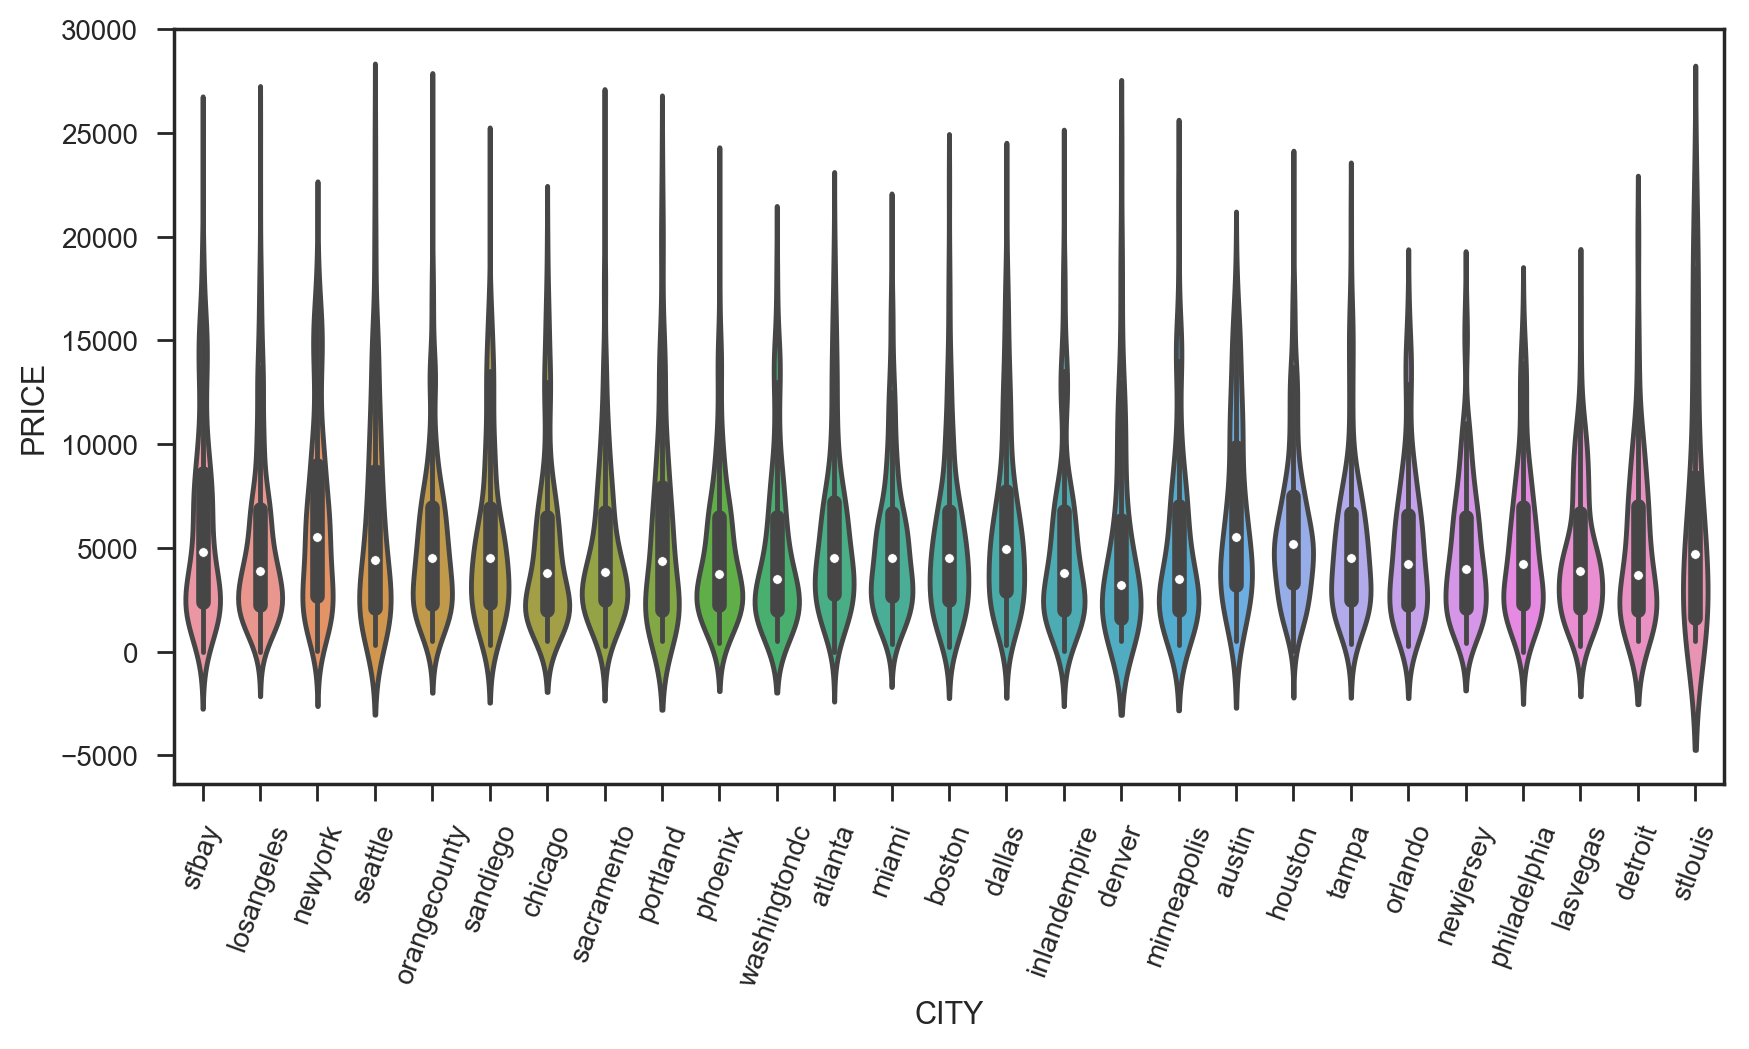

In [121]:
#sns.set_style('ticks')
#sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.violinplot(x='CITY',y='PRICE', data=df2, ax=ax)    #trim=True hue='STATE', hue='STATE', 
plt.xticks(rotation=70)
#sns.despine()

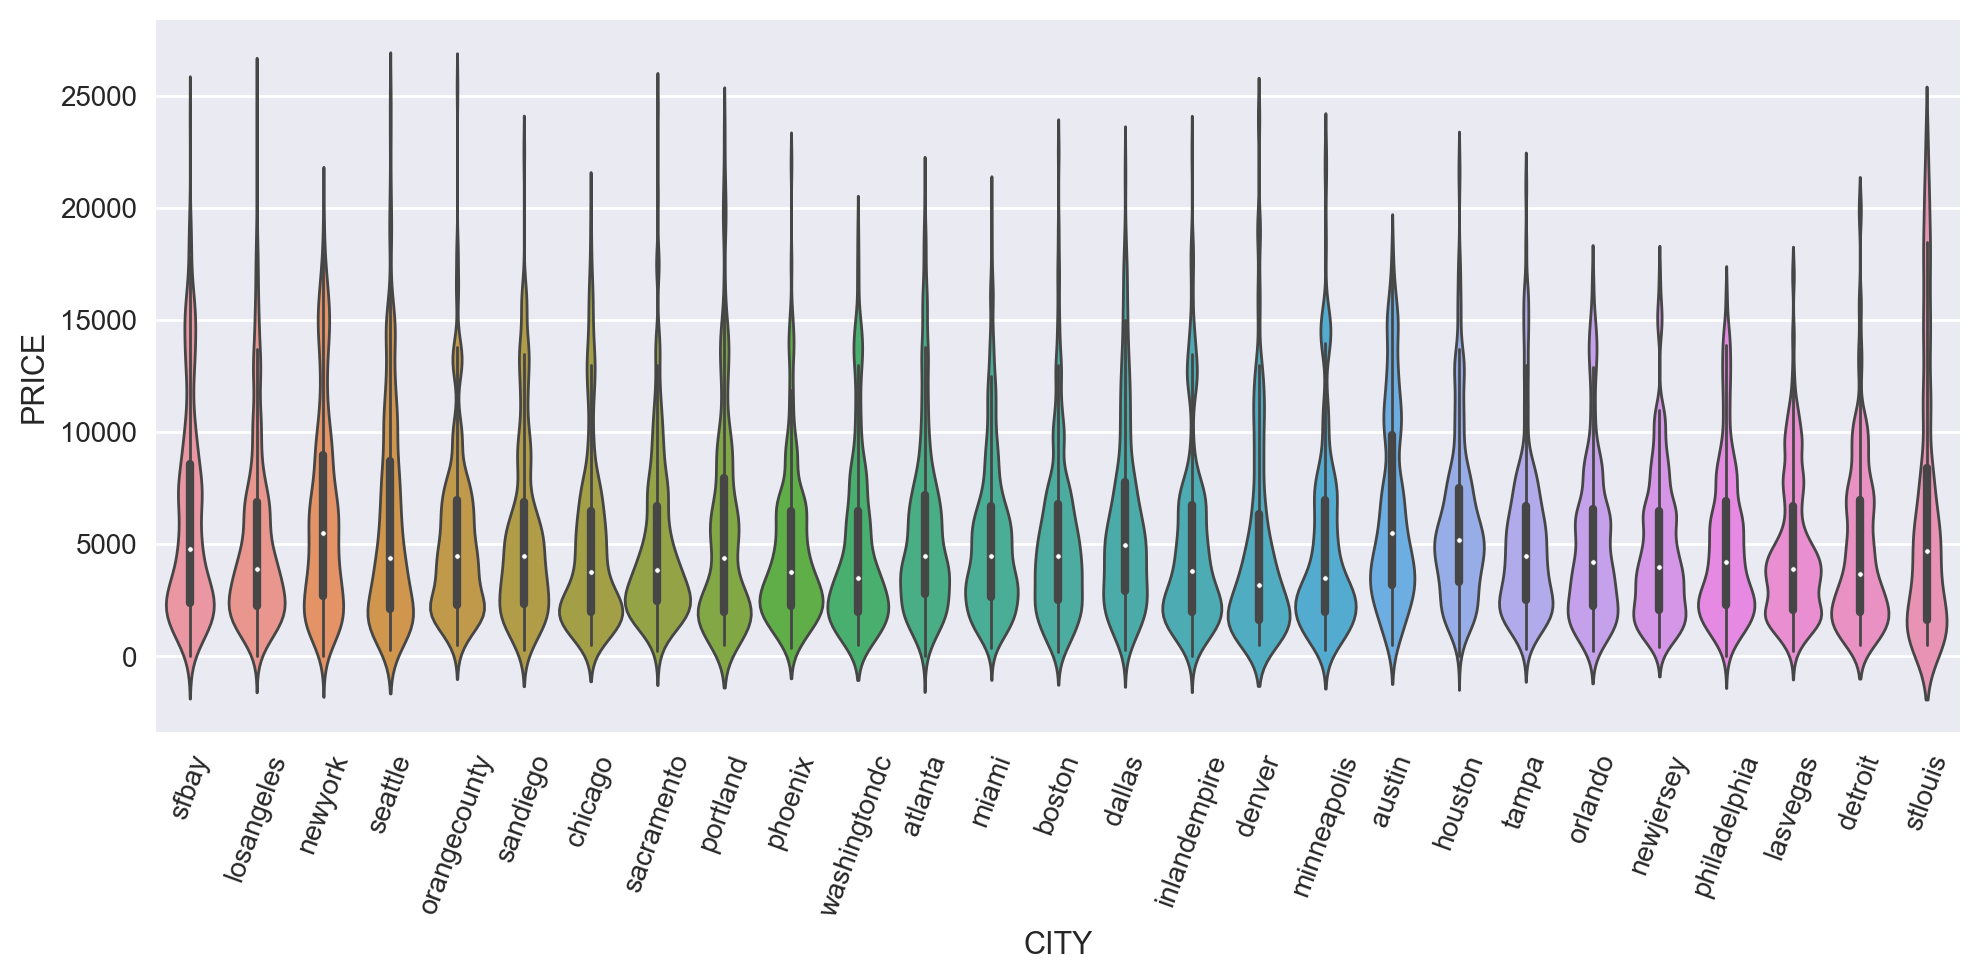

In [138]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.violinplot(x='CITY',y='PRICE', data=df2, ax=ax,  bw=0.2, width=0.98, linewidth=1)    #trim=True hue='STATE', hue='STATE', 
plt.xticks(rotation=70)
plt.tight_layout()